# Poisson Distribution - Sharks Eat Fishes

> This document is written in *R*.
>
> ***GitHub***: https://github.com/czs108

## Background

> Suppose that in a certain enclosed sea there is a population of *sharks* and a population of *fishes*.
>
> Sharks eat fishes and so the shark population increases in proportion to the number of fish eaten.

## Question A

> The *fishes* eat plants and they have plenty of food. So, if the fishes were on their own, their population would tend to *increase*.
>
> You can use the `rpois` function to decide how many fishes give birth. The *mean* number of births per **100** fishes is **1**.
>
> Write a `for` loop to model how the fish population changes over **300** months.
>
> Plot how the population changes in a graph.
>
> You can assume the initial population is **20**.

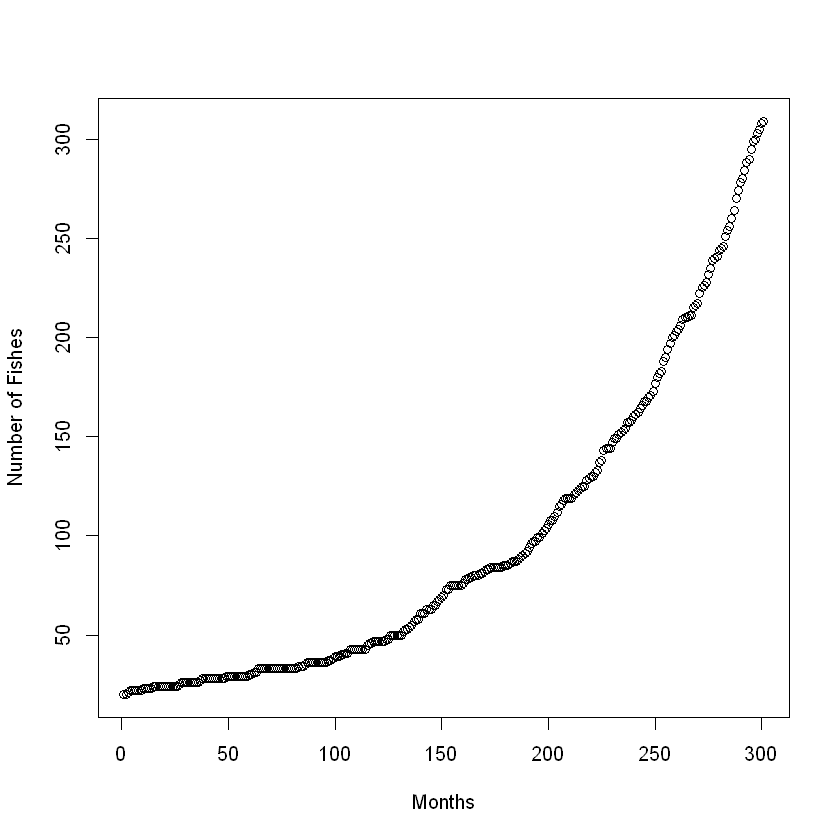

In [1]:
times <- 300
fishes <- 20

for (i in c(1:times)) {
    birth <- fishes[i] / 100
    fishes[i + 1] <- fishes[i] + rpois(n=1, lambda=birth)
}

plot(fishes, xlab="Months", ylab="Number of Fishes")

## Question B

> If the *sharks* were on their own, their population would tend to *decrease* because they would not get enough food.
>
> You can use the `rpois` function to decide how many sharks die. The *mean* number of deaths per **100** sharks is **1**.
>
> Write a `for` loop to model how the shark population changes over **300** months.
>
> Plot how the population changes in a graph.
>
> You can assume the initial population is **5**.

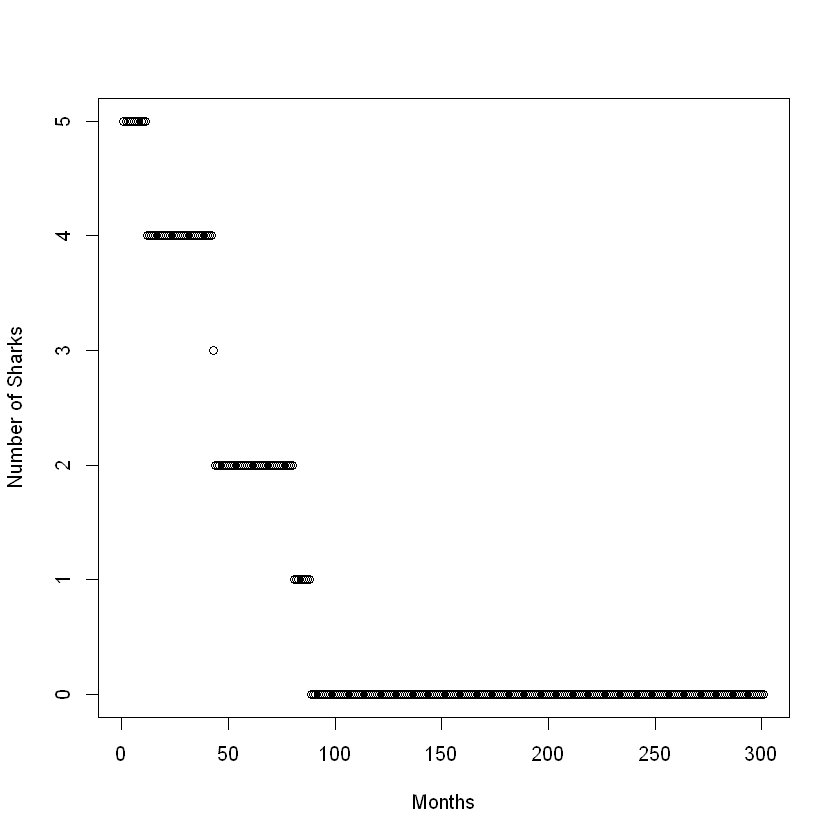

In [2]:
sharks <- 5

for (i in c(1:times)) {
    death <- sharks[i] / 100
    sharks[i + 1] <- sharks[i] - rpois(n=1, lambda=death)
}

plot(sharks, xlab="Months", ylab="Number of Sharks")

## Question C

> Now we have to model the way in which *sharks* eat *fishes*. You can assume that when a shark meets a fish, the shark eats it with the probability of **0.2**. Then they will give birth to new sharks.
>
> Suppose that we can divide the sea into **1000** different cells each with the same volume. We can assume that the sharks and fishes are randomly distributed across the **1000** cells.
>
> Compute the way the shark population and the fish population change over a period of **3000** months.
>
> You may have to include some `if` statements to stop either population falling to **0**. You could set a *minimum* population of **3**.
>
> Plot a graph showing how the populations change over time.

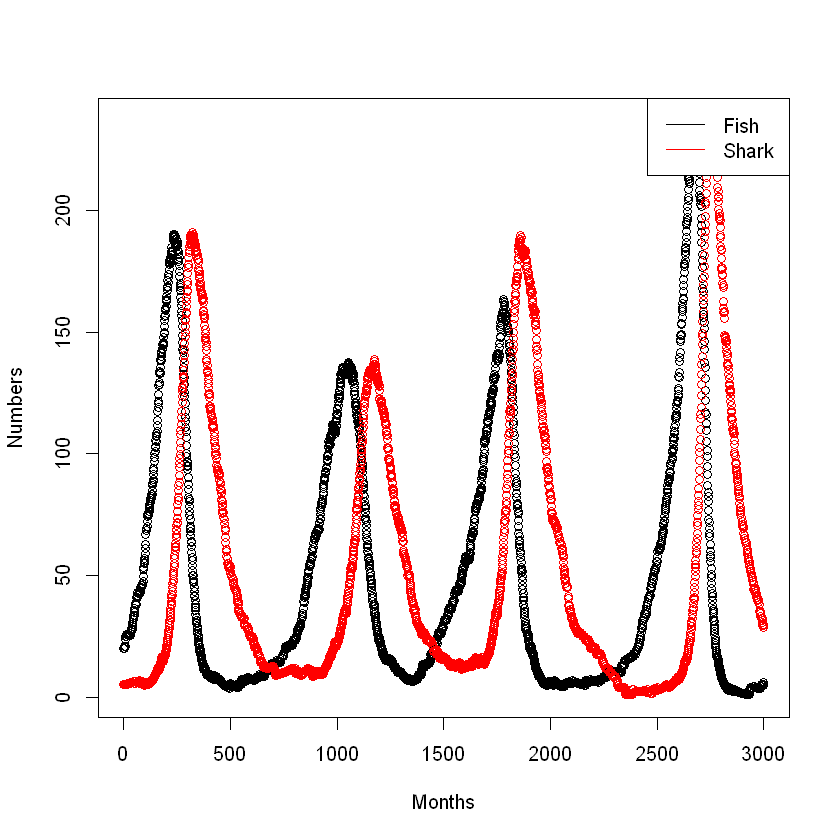

In [3]:
times <- 3000
fishes <- 20
sharks <- 5

num.min <- 3
porb.eat <- 0.2
for (i in c(1:times)) {
    sharks[i] <- ifelse(sharks[i] < 1, num.min, sharks[i])
    fishes[i] <- ifelse(fishes[i] < 1, num.min, fishes[i])

    num.birth <- fishes[i] / 100
    num.death <- sharks[i] / 100

    num.eat <- (sharks[i] / 1000) * (fishes[i] / 1000) * 1000 * porb.eat

    fishes[i + 1] <- fishes[i] + rpois(n=1, lambda=num.birth) - num.eat
    sharks[i + 1] <- sharks[i] - rpois(n=1, lambda=num.death) + num.eat
}

plot(fishes, xlab="Months", ylab="Numbers")
points(sharks, col="red")

legend("topright", legend=c("Fish", "Shark"), col=c("black", "red"), lty=1)